# Employee Turnover Analytics

## Project Statement:
Portobello Tech is an app innovator who has devised an intelligent way of 
predicting employee turnover within the company. It periodically evaluates 
employees' work details, including the number of projects they worked on, 
average monthly working hours, time spent in the company, promotions in the 
last five years, and salary level.
Data from prior evaluations shows the employees’ satisfaction in the workplace. 
The data could be used to identify patterns in work style and their interest in 
continuing to work for the company. 
The HR Department owns the data and uses it to predict employee turnover. 
Employee turnover refers to the total number of workers who leave a company 
over time.
As the ML Developer assigned to the HR Department, you have been asked to 
create ML programs to:
1. Perform data quality checks by checking for missing values, if any.
2. Understand what factors contributed most to employee turnover at EDA.
3. Perform clustering of employees who left based on their satisfaction and 
evaluation.
4. Handle the left Class Imbalance using the SMOTE technique.
5. Perform k-fold cross-validation model training and evaluate performance. 
6. Identify the best model and justify the evaluation metrics used. 
7. Suggest various retention strategies for targeted employees.


###### Importing the required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

###### Let us load the given data

In [2]:
data=pd.read_csv('HR_comma_sep.csv')

###### Let us display the head of the data

In [3]:
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [4]:
data.head().T

0       1       2      3      4
satisfaction_level      0.38     0.8    0.11   0.72   0.37
last_evaluation         0.53    0.86    0.88   0.87   0.52
number_project             2       5       7      5      2
average_montly_hours     157     262     272    223    159
time_spend_company         3       6       4      5      3
Work_accident              0       0       0      0      0
left                       1       1       1      1      1
promotion_last_5years      0       0       0      0      0
sales                  sales   sales   sales  sales  sales
salary                   low  medium  medium    low    low

###### Lets also view the Tail of the data

In [5]:
data.tail()

satisfaction_level  last_evaluation  number_project  \
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years    sales salary  
14994                      0  support    low  
14995                      0  support    low  
14996                      0  support    low  
14997                      0  support    low  
14998                      0  support    low

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">we can see there are no summary row(s) at the tail (bottom) of the dataset</span>

##### Data Dictionary

<table>
    <thead>
        <th>Column Name</th><th>Description</th>
    </thead>
    <tr>
        <th>satisfaction_level</th><th>Satisfaction level at the job of an employee</th>
    </tr>
    <tr>
        <th>last_evaluation Rating</th><th>between 0 and 1, received by an employee at his last evaluation</th>
    </tr>
    <tr>
        <th>Number_project</th><th>The number of projects an employee is involved in</th>
    </tr>
    <tr>
        <th>average_montly_hours</th><th>Average number of hours in a month spent by an employee at the office</th>
    </tr>
    <tr>
        <th>time_spend_company</th><th>Number of years spent in the company</th>
    </tr>
    <tr>
        <th>Work_accident</th><th> 0 - no accident during employee stay, 1 - accident during employee stay</th>
    </tr>
    <tr>
        <th>left</th><th>0 indicates an employee stays with the company and 1 indicates an employee left the company</th>
    </tr>
    <tr>
        <th>promotion_last_5years</th><th>Number of promotions in his stay</th>
    </tr>
    <tr>
        <th>Department</th><th>Department to which an employee belongs to</th>
    </tr>
    <tr>
        <th>salary</th><th>salary Salary in USD</th>
    </tr>
</table>

##### Let check the missing values by looking at information about the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">we can see there are 14999 rows in the dataset. No feature has null or missing value(s). There are only two features namely Sales and Salary which are of Object type. Rest all the features are of numeric types.</span>

###### Let us check whether our data is balanced?

In [8]:
data.left.value_counts(normalize=True)*100

left
0    76.191746
1    23.808254
Name: proportion, dtype: float64

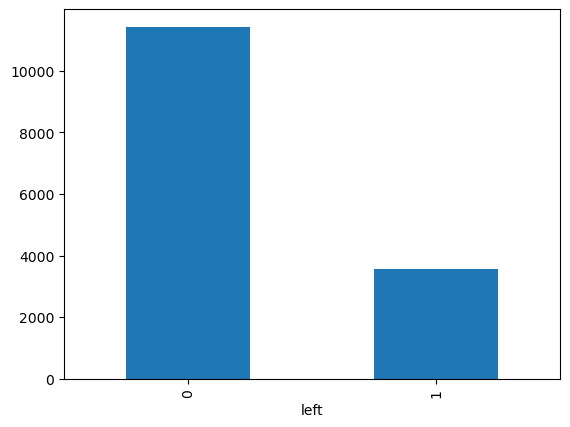

In [9]:
data.left.value_counts().plot(kind="bar")
plt.show()

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">We can see that our data is not balanced.</span>

###### Identifying duplicate rows

In [10]:
duplicateRows = data[data.duplicated(keep='first')]
duplicateRows.head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_montly_hours  time_spend_company  Work_accident  left  \
396                    139                   3              0     1   
866                    128                   3              0     1   
1317                   127                   3              0     1   
1368                   132                   3              0     1   
1461                   142                   3              0     1   

      promotion_last_5years       sales  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

###### Dropping duplicate rows

In [11]:
data.drop_duplicates(subset=None, keep='first', inplace=True)
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">We observe that the number of rows have decreased to 11991 as duplicate rows have been dropped.</span>

###### Let again check if our data is balanced?

In [13]:
data.left.value_counts(normalize=True)*100

left
0    83.39588
1    16.60412
Name: proportion, dtype: float64

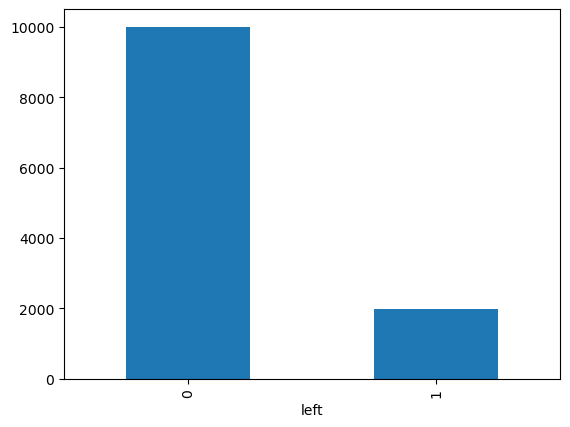

In [14]:
data.left.value_counts().plot(kind="bar")
plt.show()

######  <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">We can see that there is no change in the data balance even after the duplicate rows been removed. It is still imbalanced.</span>

###### Checking for Outliers

In [15]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [16]:
data.Work_accident.unique()

array([0, 1], dtype=int64)

In [17]:
data.number_project.unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

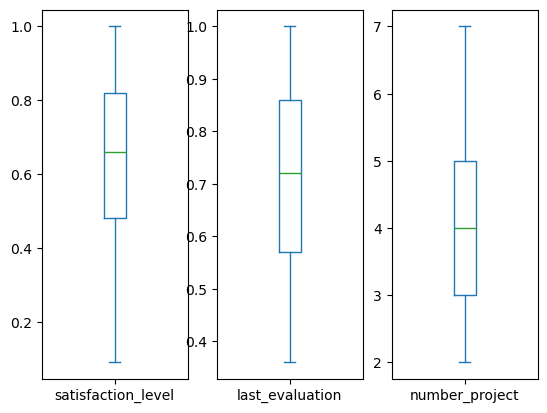

In [18]:
data[['satisfaction_level', 'last_evaluation', 'number_project']].plot(kind="box",subplots=True)
#plt.figure(figsize=(100,60))
plt.show()

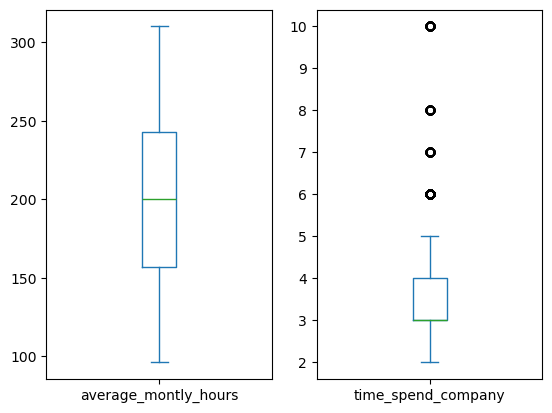

In [19]:
data[['average_montly_hours','time_spend_company']].plot(kind="box",subplots=True)
plt.show()

In [20]:
data.time_spend_company.unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">No outliers are present in the data. Some outliers in time_spend_company column do not seem to be unrealistic after seeing them.</span>

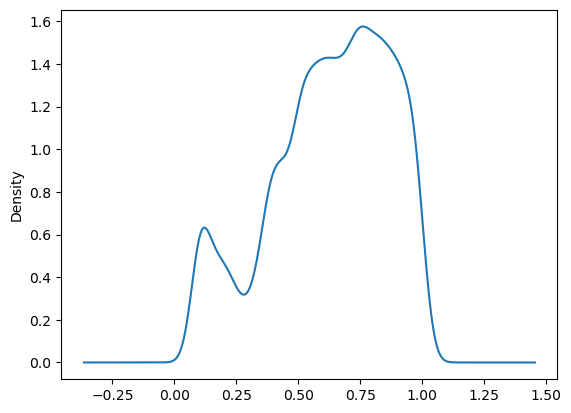

In [21]:
data.satisfaction_level.plot(kind='kde')
plt.show()

###### Check the correlation between features using heatmap

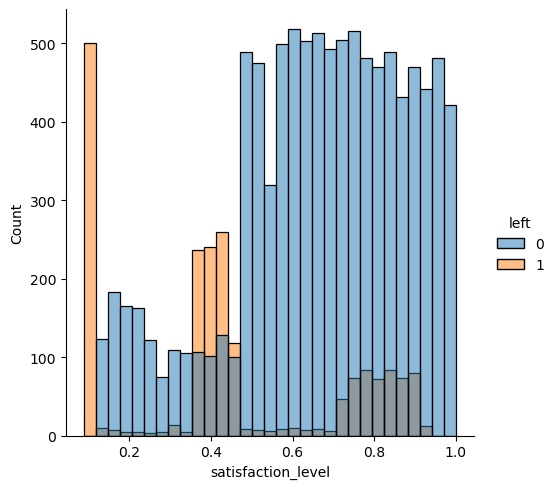

In [22]:
sns.displot(data, x="satisfaction_level",hue='left')
plt.show()

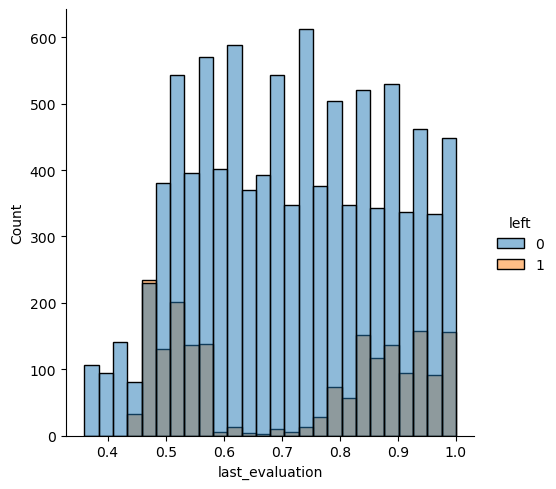

In [23]:
sns.displot(data, x="last_evaluation",hue='left')
plt.show()

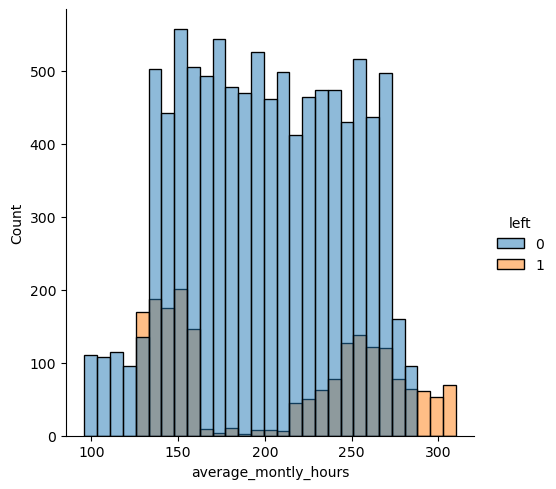

In [24]:
sns.displot(data, x="average_montly_hours",hue='left')
plt.show()

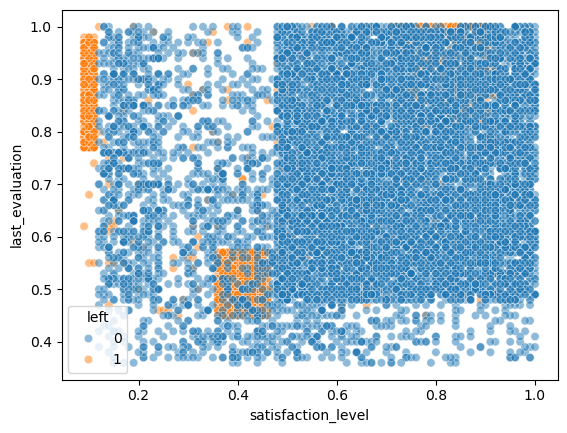

In [25]:
sns.scatterplot(data=data,x='satisfaction_level',y='last_evaluation',hue='left',legend=True,alpha=.5)
plt.show()

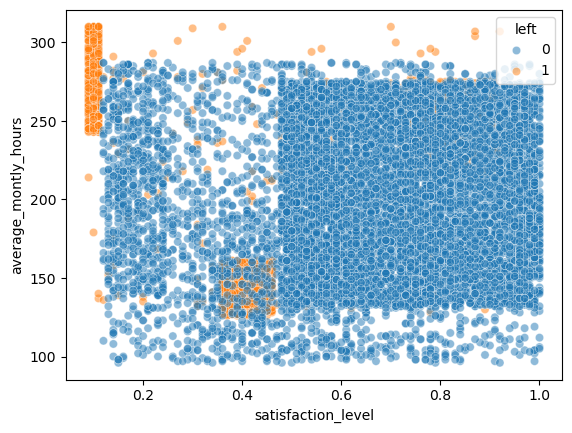

In [26]:
sns.scatterplot(data=data,x='satisfaction_level',y='average_montly_hours',hue='left',legend=True,alpha=.5)
plt.show()

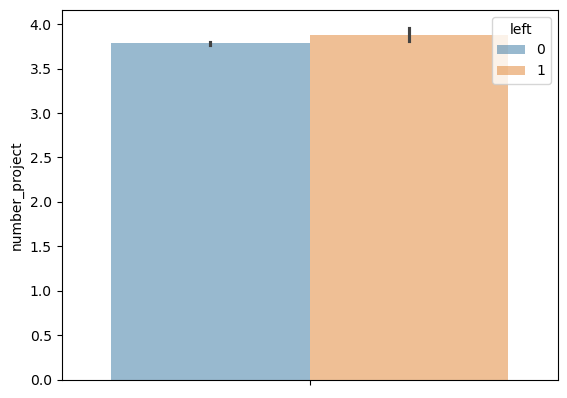

In [27]:
sns.barplot(data=data,y='number_project',hue='left',legend=True,alpha=.5)
plt.show()

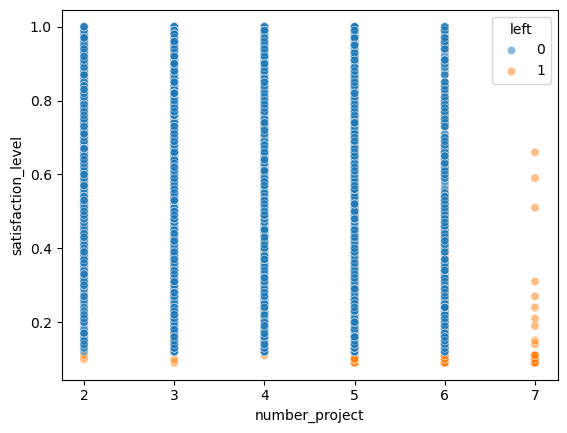

In [28]:
sns.scatterplot(data=data,y='satisfaction_level',x='number_project',hue='left',legend=True,alpha=.5)
plt.show()

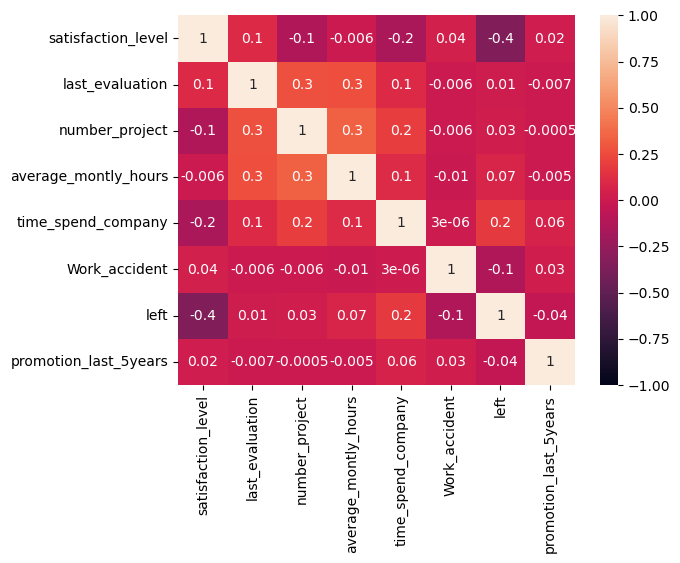

In [29]:
sns.heatmap(data.corr(numeric_only=True),annot=True,vmin=-1,fmt=".1g")
plt.show()

###### Lets check the average monthly hours working of employees who left and who stayed.

In [30]:
data.average_montly_hours[(data.left==0)].mean()

198.9427

In [31]:
data.average_montly_hours[(data.left==1)].mean()

208.16223003515822

In [32]:
data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

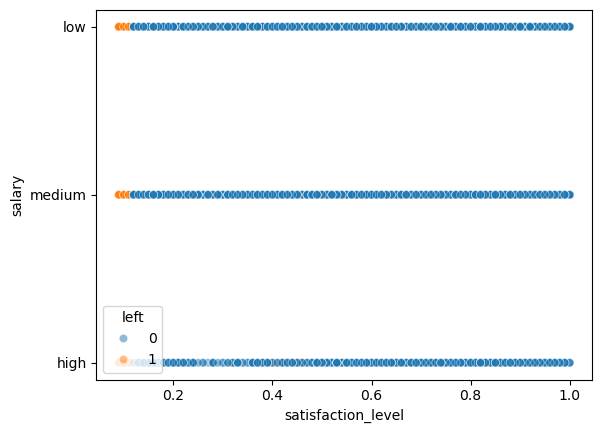

In [33]:
sns.scatterplot(data=data,x='satisfaction_level',y='salary',hue='left',legend=True,alpha=.5)
plt.show()

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">We can observe the following correlations -
<p style="background-color: #FFFF00">
<ul>
    <li><b>high correlation between left and satisfaction_level. The negative value indicates that they are inversely related. s satisfaction_level increases the tendency to leave the company decreases.</b>
    </li>
    <li><b>We can see from above plot that if satisfaction level is low, then there is high probabilty of employee leaving the company, irrespective of the salary.</b></li>
    <li><b>Work_accident is also correlated with left. It is also inversely related. If accident occurs during employees stay in company there is a chance the employee will not leave.</b>
    </li>
    <li>
        <b>promotion_last_5years is also inversely related with left. As the number of promotions increase during the employees stay in the company the less are the chances of his/her leaving </b>
    </li>
    <li>
        <b>time_spend_company is positively correlated with the left. So, as the time spent in the company increases the chances of leaving it reduces.</b>
    </li>
    <li>
        <b>number of projects is also postively correlated with left. As the number of projects in which an employee gets involved in increases, higher is the chance of his/her leaving the company.
        So, as the work load is increased the chances of leaving increases.</b>
    </li>
    <li>
        <b>average monthly work hours is positively correlated with left. As the average monthly work hours increases, greater are the chances that the employee will leave.</b>
    </li>
    <li>
        <b>Last evaluation is correlated positively with left but very insignificantly.</b>
    </li>
</ul>
</span>
</p>
    
        


###### salary feature has ordinal values low, medium and high. Since there are only three classes of data, we can use getDummies

In [34]:
data_norm=pd.get_dummies(data,columns=['salary'],dtype=int,drop_first=True)

In [35]:
data_norm.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary_low  salary_medium  
0           1              0  
1           0              1  
2           0              1  
3           1              0  
4           1              0

In [36]:
data_norm.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary_low', 'salary_medium'],
      dtype='object')

In [37]:
data_norm.shape

(11991, 11)

In [38]:
data_norm.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">We are not going to use getDummies for sales feature as there are 10 data classes in it and using getDummies will increase the number of features significantly, thereby also increasing the dimensions of the problem. So, we will use LabelEncoder to encode the values of the department.</span> 

###### Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le=LabelEncoder()

In [41]:
data_norm.sales=le.fit_transform(data_norm.sales)

In [42]:
data_norm.sales

0        7
1        7
2        7
3        7
4        7
        ..
11995    4
11996    4
11997    4
11998    5
11999    0
Name: sales, Length: 11991, dtype: int32

In [43]:
data_norm.sales.unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

In [44]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  int32  
 9   salary_low             11991 non-null  int32  
 10  salary_medium          11991 non-null  int32  
dtypes: float64(2), int32(3), int64(6)
memory usage: 1.2 MB


###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">Now all the columns have numeric data. We can now proceed to perform splitting on the data</span>

###### Splitting data into train and test subsets

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
data_norm_X=data_norm.drop(columns=['left'])
data_norm_X.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  sales  \
0                   3              0                      0      7   
1                   6              0                      0      7   
2                   4              0                      0      7   
3                   5              0                      0      7   
4                   3              0                      0      7   

   salary_low  salary_medium  
0           1              0  
1           0              1  
2           0              1  
3           1              0  
4           1              0

In [47]:
data_norm_y=data_norm['left']
data_norm_y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [48]:
data_norm.shape

(11991, 11)

In [49]:
data_norm_X.shape

(11991, 10)

In [50]:
data_norm_y.shape

(11991,)

###### Let us split the dataset into test and train data subsets

In [51]:
X,xt,y,yt=train_test_split(data_norm_X,
                          data_norm_y,
                          test_size=.20,
                          random_state=123)

In [52]:
X.shape

(9592, 10)

In [53]:
xt.shape

(2399, 10)

In [54]:
y.shape

(9592,)

In [55]:
yt.shape

(2399,)

###### Let us again check the balance of data

In [56]:
y.value_counts(normalize=True)*100

left
0    83.309008
1    16.690992
Name: proportion, dtype: float64

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">Data is imbalanced. So we will split using stratify option</span>

In [57]:
X,xt,y,yt=train_test_split(data_norm_X,
                          data_norm_y,
                          test_size=.20,
                          stratify=data_norm_y, 
                          random_state=123)

In [58]:
X.shape

(9592, 10)

In [59]:
xt.shape

(2399, 10)

In [60]:
y.shape

(9592,)

In [61]:
yt.shape

(2399,)

In [62]:
np.unique(y,return_counts=True)

(array([0, 1], dtype=int64), array([7999, 1593], dtype=int64))

In [63]:
y.value_counts(normalize=True)*100

left
0    83.39241
1    16.60759
Name: proportion, dtype: float64

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">We observe that there is no change in the balance of the data. It is still imbalanced. Let us now perform SMOTE technique to balance the target</span>

###### SMOTE (Synthetic Minoriry Oversampling Technique)

In [64]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

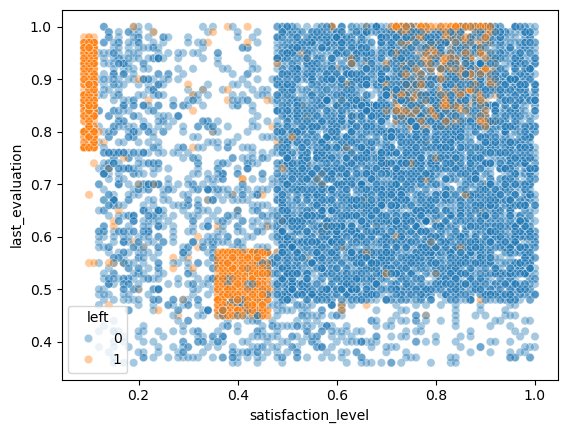

In [65]:
sns.scatterplot(x=X['satisfaction_level'],y=X['last_evaluation'],hue=y,alpha=.4)
plt.show()

In [66]:
sm=SMOTE()

In [67]:
sm_X,sm_y=sm.fit_resample(X,y)

In [68]:
np.unique(sm_y,return_counts=True)

(array([0, 1], dtype=int64), array([7999, 7999], dtype=int64))

In [69]:
sm_X.shape

(15998, 10)

In [70]:
sm_y.shape

(15998,)

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">We can observe that the number of rows have increased after SMOTE indictive of OVER SAMPLING performed by SMOTE technique</span>

###### Let us now check whether the target data is balanced after SMOTE or not

###### Let us check the percentage of two data classes in target feature - left

In [71]:
sm_y.value_counts(normalize=True)*100

left
0    50.0
1    50.0
Name: proportion, dtype: float64

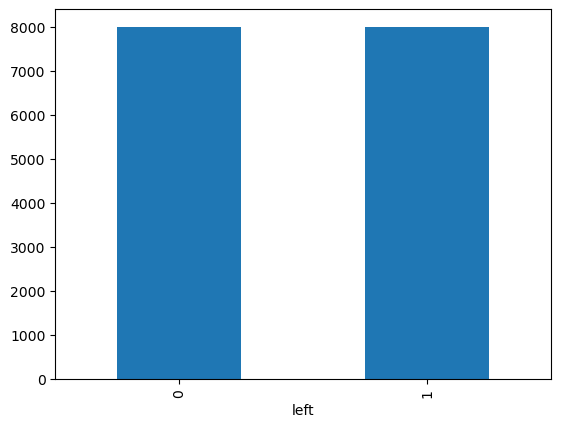

In [72]:
sm_y.value_counts().plot(kind="bar")
plt.show()

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">Now finally we see that the data is balanced.</span>

###### Let us now check the scatter of target data after SMOTE 

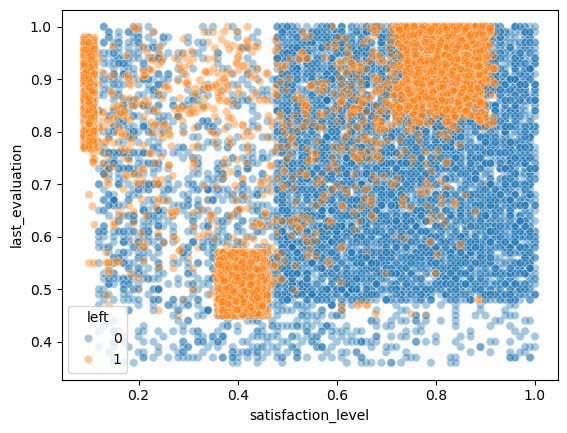

In [73]:
sns.scatterplot(x=sm_X['satisfaction_level'],y=sm_X['last_evaluation'],hue=sm_y,alpha=.4)
plt.show()

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">We can observe that the target data is now balanced. <br/>We can further observe increased orange dots in the plot. So SMOTE has performed OVER SAMPLING.</span>

###### Scaling

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
mms=MinMaxScaler()

In [76]:
data_trans_mms_X=mms.fit_transform(sm_X)
df_data_trans_mms_X=pd.DataFrame(data_trans_mms_X)
df_data_trans_mms_X.head(3)

0         1    2         3      4    5    6         7    8    9
0  0.384615  0.312500  0.2  0.126168  0.125  0.0  0.0  0.222222  0.0  1.0
1  0.978022  0.125000  0.4  0.271028  0.500  1.0  0.0  0.777778  0.0  1.0
2  0.736264  0.984375  0.2  0.172897  0.250  0.0  0.0  0.777778  1.0  0.0

In [77]:
df_data_trans_mms_X.shape

(15998, 10)

In [78]:
data_trans_mms_xt=mms.transform(xt)

In [79]:
data_trans_mms_xt.shape

(2399, 10)

In [80]:
df_data_trans_mms_xt=pd.DataFrame(data_trans_mms_xt)
df_data_trans_mms_xt.head()

0         1    2         3      4    5    6         7    8    9
0  0.802198  0.921875  0.8  0.443925  0.500  0.0  0.0  0.222222  0.0  1.0
1  0.098901  0.781250  0.6  0.799065  0.250  0.0  0.0  0.222222  0.0  1.0
2  0.593407  0.968750  0.4  0.299065  0.000  0.0  0.0  0.777778  0.0  1.0
3  0.373626  0.234375  0.0  0.247664  0.125  1.0  0.0  0.222222  0.0  1.0
4  0.461538  0.968750  0.4  0.696262  0.125  0.0  0.0  0.888889  0.0  1.0

In [81]:
sm_y.value_counts(normalize=True)*100

left
0    50.0
1    50.0
Name: proportion, dtype: float64

###### Putting Column headers to scaled data

In [82]:
data_norm.drop(columns=['left']).columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary_low', 'salary_medium'],
      dtype='object')

In [83]:
df_data_trans_mms_X.columns=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary_low', 'salary_medium']

In [84]:
df_data_trans_mms_X.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            0.384615         0.312500             0.2              0.126168   
1            0.978022         0.125000             0.4              0.271028   
2            0.736264         0.984375             0.2              0.172897   
3            0.417582         0.296875             0.0              0.280374   
4            0.824176         0.500000             0.4              0.257009   

   time_spend_company  Work_accident  promotion_last_5years     sales  \
0               0.125            0.0                    0.0  0.222222   
1               0.500            1.0                    0.0  0.777778   
2               0.250            0.0                    0.0  0.777778   
3               0.000            0.0                    0.0  0.444444   
4               0.000            0.0                    0.0  1.000000   

   salary_low  salary_medium  
0         0.0            1.0  
1         0.0            1.0  
2         1.0            0.0  
3         0.0            1.0  
4         1.0            0.0

###### K-Mean Clustering

In [85]:
from sklearn.cluster import KMeans

In [86]:
km=KMeans(n_clusters=3)

In [87]:
cluster_data=df_data_trans_mms_X.drop(columns=['last_evaluation', 'number_project',
       'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary_low', 'salary_medium'])

In [88]:
cluster_data.head()

satisfaction_level  average_montly_hours
0            0.384615              0.126168
1            0.978022              0.271028
2            0.736264              0.172897
3            0.417582              0.280374
4            0.824176              0.257009

In [89]:
km.fit(cluster_data)

C:\Users\JK1578\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [90]:
km.cluster_centers_

array([[0.40041245, 0.24908745],
       [0.76239325, 0.59936502],
       [0.06090827, 0.81763014]])

In [91]:
km.cluster_centers_[:,0]

array([0.40041245, 0.76239325, 0.06090827])

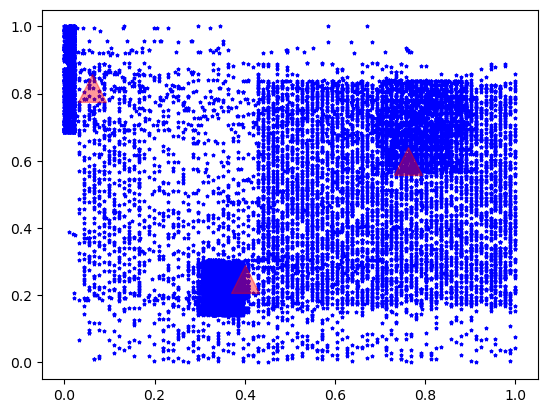

In [92]:
plt.scatter(cluster_data.satisfaction_level, cluster_data.average_montly_hours,
            marker='*', s =5, c="b")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='^',s=400,
            alpha=0.4,
            c='r')
plt.show()

In [93]:
df_data_trans_mms_X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary_low', 'salary_medium'],
      dtype='object')

In [94]:
cluster_data1=df_data_trans_mms_X.drop(columns=['number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary_low', 'salary_medium'])

In [95]:
cluster_data1.head()

satisfaction_level  last_evaluation
0            0.384615         0.312500
1            0.978022         0.125000
2            0.736264         0.984375
3            0.417582         0.296875
4            0.824176         0.500000

In [96]:
XX=cluster_data1.iloc[:,[0,1]].values
XX

array([[0.38461538, 0.3125    ],
       [0.97802198, 0.125     ],
       [0.73626374, 0.984375  ],
       ...,
       [0.3831584 , 0.27917835],
       [0.01460202, 0.87992401],
       [0.01098901, 0.78761796]])

In [97]:
y_kmeans=km.fit_predict(XX)
y_kmeans

C:\Users\JK1578\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, ..., 1, 2, 2])

In [98]:
cluster_centers=km.cluster_centers_
cluster_centers

array([[0.75335386, 0.76705965],
       [0.45630015, 0.27405428],
       [0.06354379, 0.77558152]])

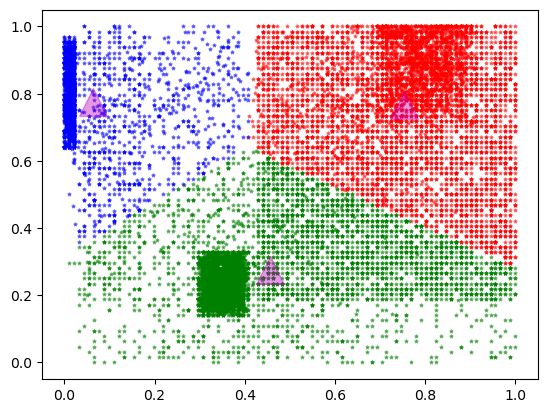

In [99]:
plt.scatter(XX[y_kmeans==0,0], XX[y_kmeans==0,1], marker='*', s =5, c="r",alpha=.5)
plt.scatter(XX[y_kmeans==1,0], XX[y_kmeans==1,1], marker='*', s =5, c="g",alpha=.5)
plt.scatter(XX[y_kmeans==2,0], XX[y_kmeans==2,1], marker='*', s =5, c="b",alpha=.5)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker='^',s=400, alpha=0.4,c='m')
plt.show()

###### Elbow Method for kMeans

In [100]:
values=[]
for k in range(2,20):
    km=KMeans(n_clusters=k,n_init='auto')
    km.fit(cluster_data1)
    values.append(km.inertia_)

In [101]:
km.inertia_

92.21519072782971

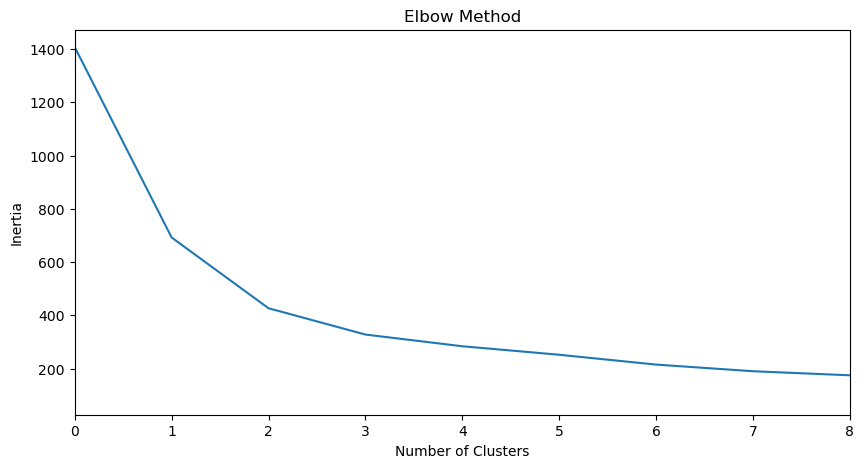

In [102]:
plt.figure(figsize=(10,5))
plt.plot(values)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.xlim(0,8)
plt.show()

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">We can observe from the plot of elbow method thath the number of clusters for optimal rsult is 3. We have already created 3 clusters. So we are all good.</span>

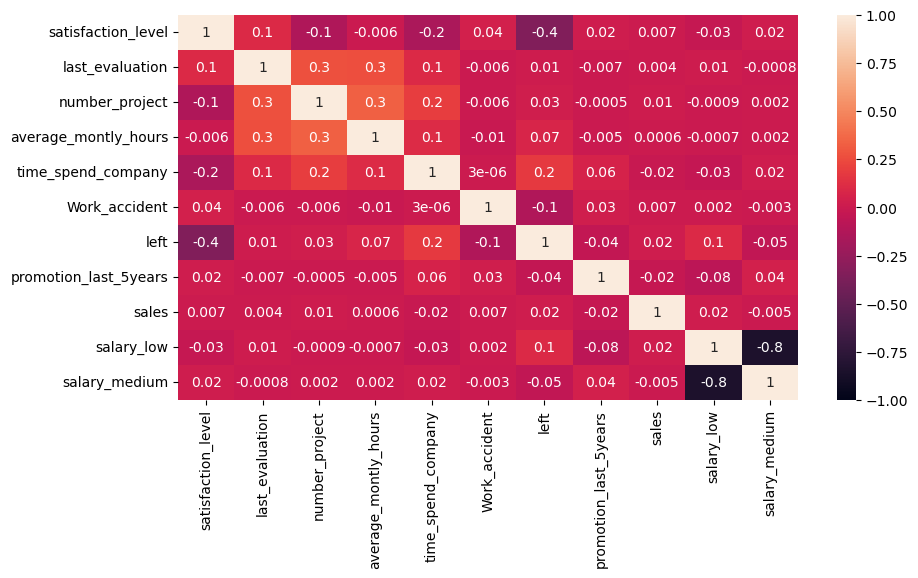

In [103]:
plt.figure(figsize=(10,5))
sns.heatmap(data_norm.corr(numeric_only=True),annot=True,vmin=-1,fmt=".1g")
plt.show()

### LogisticRegression

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
lr=LogisticRegression()

In [106]:
lr.fit(df_data_trans_mms_X,sm_y)

LogisticRegression()

In [107]:
lr.score(df_data_trans_mms_xt,yt)  

C:\Users\JK1578\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7561483951646519

###### Lets  find the accuracy score, which gives score as score fuction 

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
accuracy_score(yt,lr.predict(df_data_trans_mms_xt))

C:\Users\JK1578\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7561483951646519

###### We have got a score of 0.75 without stratify. Let us check the score after stratifying

In [110]:
lr=LogisticRegression()

In [111]:
lr.fit(df_data_trans_mms_X,sm_y)

LogisticRegression()

####  Stratify

###### Now let us check the score after using stratify

In [112]:
X,xt,y,yt=train_test_split(data_norm_X,
                          data_norm_y,
                          test_size=.20,
                          stratify=data_norm_y, 
                          random_state=123)

In [113]:
lr=LogisticRegression()

In [114]:
lr.fit(X,y)    #Fitting the Logistic Regession Model over the data

C:\Users\JK1578\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:
lr.score(X,y)

0.8306922435362802

###### Check the ACCURACY SCORE of the LOGISTIC REGRESSION model over BALANCED and STRATIFIED data 

In [116]:
accuracy_score(yt,lr.predict(xt))

0.8282617757398916

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">Stratified data is giving better score of 0.82 as compared to non-stratified data which gave 0.75. So, we note that stratifiction of data has resulted in better accuracy score</span>

### K-Fold Cross Validation

In [117]:
from sklearn.model_selection import cross_val_score # KFold 

In [118]:
res=cross_val_score(lr,X,y,cv=5)  
res

C:\Users\JK1578\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JK1578\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

array([0.83116206, 0.83220427, 0.83263816, 0.83159541, 0.83315954])

In [119]:
res.mean()

0.8321518908929475

In [120]:
predicted_val=lr.predict(xt)

In [121]:
predicted_val

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [122]:
type(predicted_val)

numpy.ndarray

In [123]:
predicted_val=pd.DataFrame(predicted_val) #Converting array to DataFrame

In [124]:
predicted_val.value_counts()

0    2227
1     172
Name: count, dtype: int64

In [125]:
predicted_val.value_counts(normalize=True)*100

0    92.830346
1     7.169654
Name: proportion, dtype: float64

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">We observe in the predicted result that nearly 93% employees stay in the organisation. Approximately 7% leave it.

### Confusion Matrix of Logistic Regression Model`m

In [126]:
from sklearn.metrics import confusion_matrix

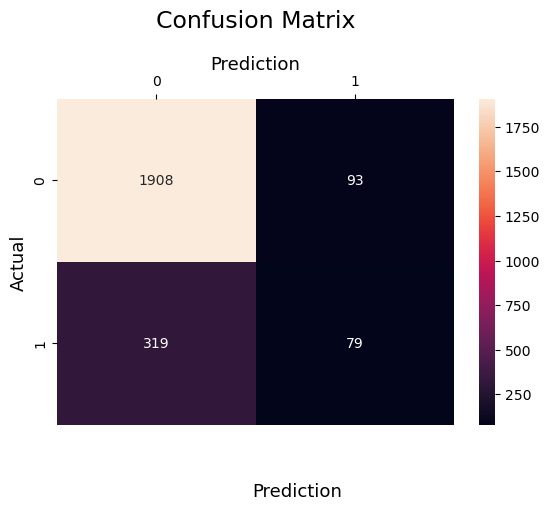

In [127]:
cm = confusion_matrix(yt,predicted_val)
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">From the confusion matrix of the Logistic Regression model we observe that on 93 counts the model predicted that employee left but actually the employee did not leave <b>(False Positive)</b>. Similarly, on 319 occasions the model predicted that employee will NOT leave but actually they did leave. So, these were <b>False Negative</b> cases. </span> 

### Classification Report of Logistic Regression Model

In [128]:
from sklearn.metrics import classification_report

In [129]:
print(classification_report(yt,predicted_val))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2001
           1       0.46      0.20      0.28       398

    accuracy                           0.83      2399
   macro avg       0.66      0.58      0.59      2399
weighted avg       0.79      0.83      0.80      2399



###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">We observe that the precision and recall scores for NOT LEFT predictions are good as compared to prediction scores for LEFT. For the company it is more costilier if employee leaves and your model could not predict it correctly (FALSE NEGATIVE). The HR team will not be looking for a replacement and the situation can beccome such that the work may be effected. For FLASE POSITIVE cases, i.e; employee did not leave but the model predicted that the employee will leave, the cost is relatively less. In this case HR will be looking for a replacement but their excercise may go invain or the replacement may be absorbed in some other capacity, atleast the work will not get effected. </span>

### ROC Curve of Logistic Regression Model

In [130]:
y_scores=lr.predict_proba(xt)

In [131]:
fpr, tpr, thresholds=metrics.roc_curve(yt, y_scores[:,1])

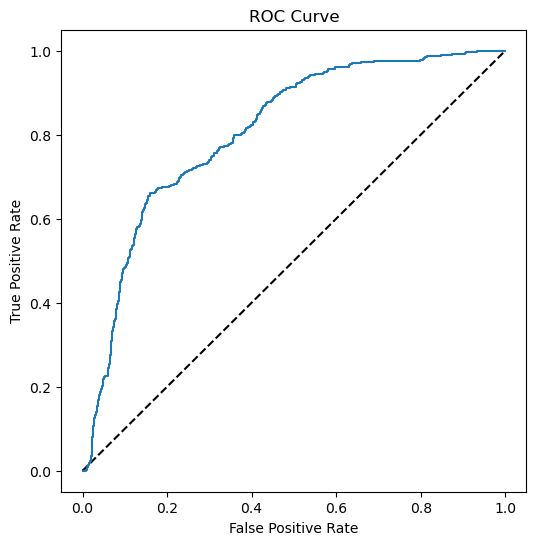

In [132]:
fig=plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">The ideal ROC curve should be L shaped. We will try other models and check if we can improve upon this curve.</span>

### Area Under the Curve (AUC) for Logistic Regression Model

In [133]:
auc=metrics.roc_auc_score(yt, y_scores[:,1])
print(auc)

0.8073814851368284


###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">The AUC score is 0.80 approx. We will try other models and check if we can improve upon this score.</span>

### Random Forest Classifier

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
rf=RandomForestClassifier()

In [136]:
rf.fit(X,y)

RandomForestClassifier()

In [137]:
rf.score(X,y)  

1.0

In [138]:
accuracy_score(yt,rf.predict(xt))

0.9820758649437266

### K-Fold Cross Validation

In [139]:
res=cross_val_score(rf,X,y,cv=5)  # training data over 5 chunks of data iteratively
res

array([0.98645128, 0.98540907, 0.98435871, 0.98488008, 0.98383733])

In [140]:
res.mean()  # mean of the score of RF model trained over 5 chunks of data

0.9849872929776925

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">We are getting very good score in Random Forest Classifier model</span>

### Confusion Matrix of Random Forest Classifier model

In [141]:
predicted_val=rf.predict(xt)
predicted_val

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [142]:
predicted_val=pd.DataFrame(predicted_val)

In [143]:
predicted_val.value_counts()

0    2032
1     367
Name: count, dtype: int64

In [144]:
predicted_val.value_counts(normalize=True)*100

0    84.701959
1    15.298041
Name: proportion, dtype: float64

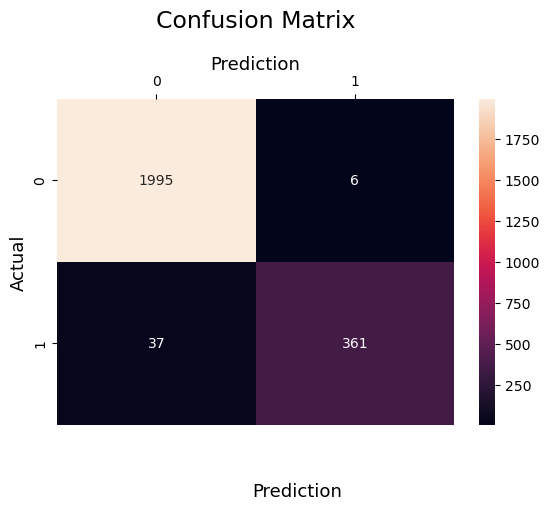

In [145]:
cm = confusion_matrix(yt,predicted_val)
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">In Random Forest Classifier the False Positive and False Negative cases are lower than the Logistic Regression Model. We will prefer the model which keeps FALSE NEGATIVE cases to minimum in this scenario. </span>

### ROC Curve of Random Forest Classsifier

In [146]:
y_scores=rf.predict_proba(xt)

In [147]:
fpr, tpr, thresholds=metrics.roc_curve(yt, y_scores[:,1])

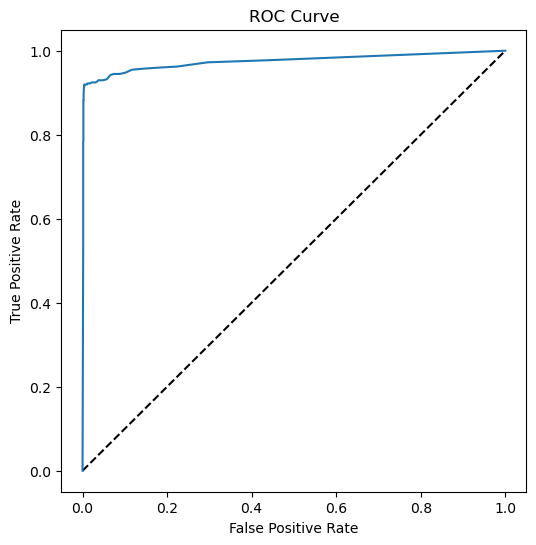

In [148]:
fig=plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">The ROC curve is nearly L-Shaped. Hence, indicative of good performance of the model.</span>

### AUC Score

In [149]:
auc=metrics.roc_auc_score(yt, y_scores[:,1])
print(auc)

0.9746885351294202


###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">The Area Under the Curve (AUC) score is also indicating better performance of RFC compared to Logestic Regression Model.</span>

### Classification Report of Random Forest Classfier 

In [150]:
print(classification_report(yt,predicted_val))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.98      0.91      0.94       398

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.97      2399
weighted avg       0.98      0.98      0.98      2399



###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">The True Positive Rate (Recall) is 1.o for "not left" cases and 0.90 for left case, which is better than Logistic regression model.<br/>The precision scores are also 0.98 for both class of values (0 and 1), which is good score. if precision tends to 1 then FALSE POSTIVE tends to zero. Since, precision value is 0.98, nearly 1 so FALSE POSTIVE cases are also negligible.</span> </span>

###### Feature Importance

In [151]:
rf.feature_importances_

array([0.32326009, 0.12417438, 0.18893855, 0.16177848, 0.17302436,
       0.00698638, 0.00106036, 0.01340685, 0.00450828, 0.00286227])

<Axes: >

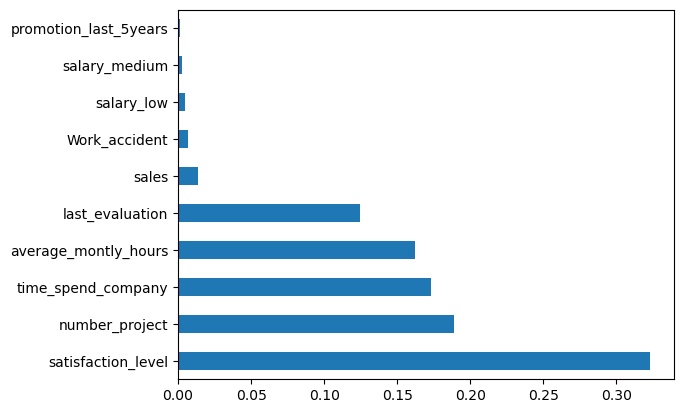

In [152]:
pd.Series(rf.feature_importances_,index=X.columns).nlargest(10).plot(kind="barh")

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">The above plot displays the features with their importance in prediction. As evident, Satisfaction Level is the most important feature used by the model in prediction. It is followed by number of projects involved in, time spend in the company, average monthly hours worked and last evaluation. Department , accident during working period, salary and promotion in last 5 years have very little impoprtance in result prediction.</span>

### Gradient Boosting Classifier

In [153]:
from sklearn.ensemble import GradientBoostingClassifier

In [154]:
gbc=GradientBoostingClassifier()

In [155]:
gbc.fit(X,y)

GradientBoostingClassifier()

###### Accuracy scores for Gradient Boosting Classifier

In [156]:
gbc.score(xt,yt)

0.9791579824927052

In [157]:
accuracy_score(yt,gbc.predict(xt))

0.9791579824927052

In [158]:
res=cross_val_score(gbc,X,y,cv=5)  
res

array([0.98071912, 0.98071912, 0.97862357, 0.98175182, 0.98331595])

In [159]:
res.mean()

0.9810259188478533

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">We observe good accuracy scores for Gradient Boosting Classifier</span>

### Confusion Matrix for Gradient Boosting Classifier

In [160]:
predicted_val=gbc.predict(xt)
predicted_val

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

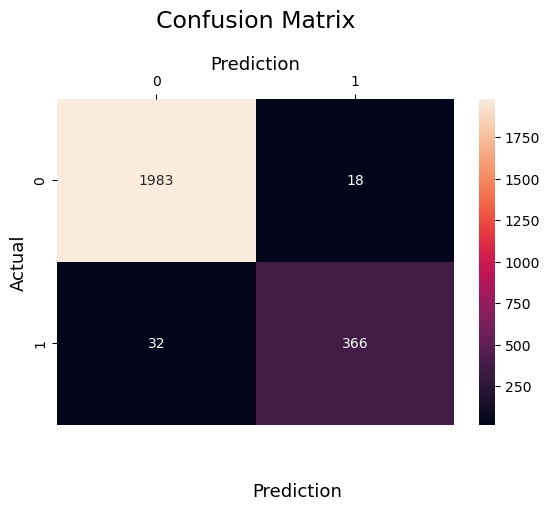

In [161]:
cm = confusion_matrix(yt,predicted_val)
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

### Classification Report for Gradient Boosting Classifier

In [162]:
print(classification_report(yt,predicted_val))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2001
           1       0.95      0.92      0.94       398

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.96      2399
weighted avg       0.98      0.98      0.98      2399



### ROC Curve of Gradient Booting Classifier

In [163]:
y_scores=gbc.predict_proba(xt)

In [164]:
fpr, tpr, thresholds=metrics.roc_curve(yt, y_scores[:,1])

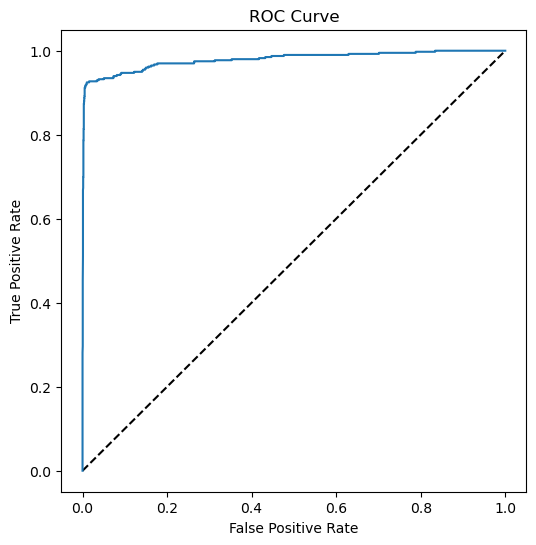

In [165]:
fig=plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Area Under the Curve (AUC) score of GBC

In [166]:
auc=metrics.roc_auc_score(yt, y_scores[:,1])
print(auc)

0.9792867385402776


###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">We observe that Area Under the Cuirve (AUC) score is good one.</span>

### Principal Component Analysis (PCA)

In [167]:
from sklearn.decomposition import PCA

In [168]:
pc=PCA(n_components=8)
pc

PCA(n_components=8)

In [169]:
x_tr_pca=pc.fit_transform(X)

In [170]:
variance=pc.explained_variance_ratio_
variance

array([9.94963063e-01, 3.49950689e-03, 7.64648454e-04, 4.69672413e-04,
       1.92081685e-04, 5.43284927e-05, 2.37592924e-05, 1.56070328e-05])

In [171]:
variance.round(decimals=4)*100

array([9.95e+01, 3.50e-01, 8.00e-02, 5.00e-02, 2.00e-02, 1.00e-02,
       0.00e+00, 0.00e+00])

In [172]:
cum_var=variance.cumsum().round(decimals=4)*100
cum_var

array([ 99.5 ,  99.85,  99.92,  99.97,  99.99,  99.99, 100.  , 100.  ])

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 100, 'Threshold-cutoff-99.99%')

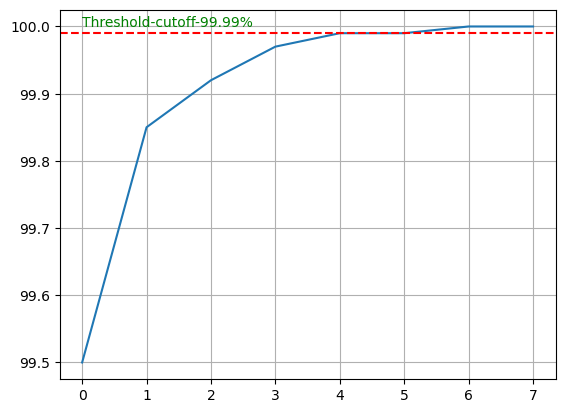

In [174]:
plt.grid()
plt.plot(cum_var)
plt.axhline(color="r",y=99.99,linestyle="--")
plt.text(0,100,"Threshold-cutoff-99.99%",color="g")

In [175]:
pca=PCA(n_components=6)   # Taking n as 6

In [176]:
x_final=pca.fit_transform(X)
xt_final=pca.transform(xt)

In [177]:
pd.DataFrame(x_final).head()

0         1         2         3         4         5
0 -77.463308  3.905427 -0.219977  0.095529 -0.722443 -0.173873
1 -46.449229 -1.059050  2.818488  0.460647 -0.673086  0.847616
2 -67.461630 -1.084770  0.693603  0.542156  0.697764 -0.158484
3 -44.475975  1.884136 -1.658647  0.919513 -0.759616 -0.171129
4 -49.461002 -3.125530 -0.914010 -0.944510  0.645674 -0.145978

In [178]:
rf_pca=RandomForestClassifier()

In [179]:
rf_pca.fit(x_final,y)

RandomForestClassifier()

### Confusion Matrix of Random Forest Classfier after applying PCA

In [180]:
result=rf_pca.predict(xt_final)

In [181]:
result.shape

(2399,)

In [182]:
yt.shape

(2399,)

In [183]:
accuracy_score(yt,result)

0.968736973739058

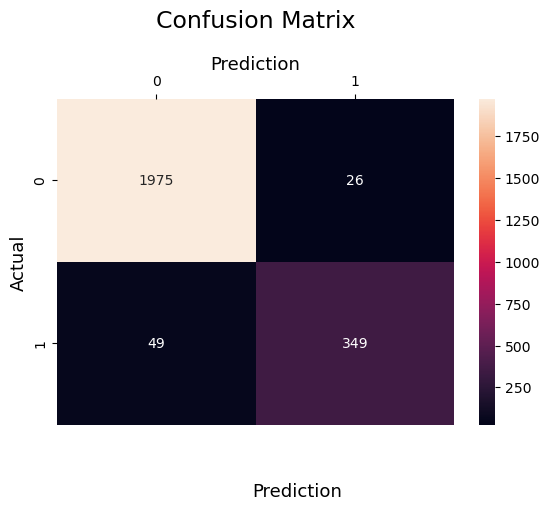

In [184]:
cm = confusion_matrix(yt,result)
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">There FALSE POSTITIVE AND FALSE NEGATIVE cases count are also no better than those compared with RFC model without PCA. This also strengthens our case for not using PCA.</spam>

### ROC Curve of Random Forest Classfier with PCA

In [185]:
from sklearn import metrics

In [186]:
y_scores=rf_pca.predict_proba(xt_final)

In [187]:
fpr, tpr, thresholds=metrics.roc_curve(yt, y_scores[:,1])

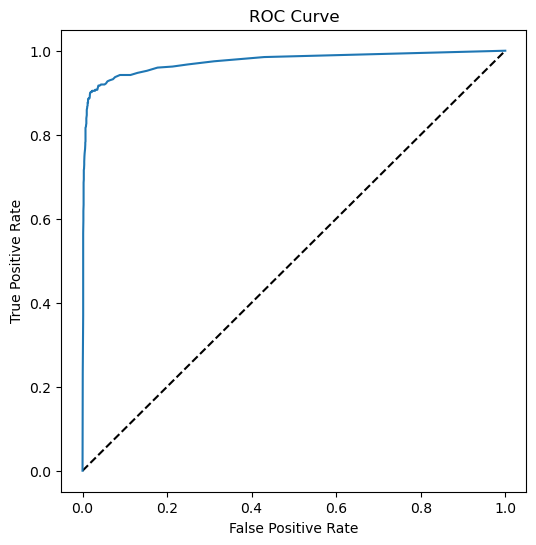

In [188]:
fig=plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [189]:
auc=metrics.roc_auc_score(yt, y_scores[:,1])
print(auc)

0.974640820293371


###### <span style="background-color: #FFFF00;float: left; outline: 2px solid black;width:100%;">We can see that there is no (susbtantial) gain in accuracy score on applying PCA technique. So drop this idea. Moreover the number of features are not large.</span>

###### Voting Classifier

In [190]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [191]:
nb=GaussianNB()
svc=SVC(probability=True)
knn=KNeighborsClassifier()
lr= LogisticRegression(max_iter=1000)
gbc=GradientBoostingClassifier()
rf=RandomForestClassifier()

In [192]:
#model=[("Decision Tree",dt),("Naive_bayes",nb),("Logistic Regression",lr),("K_Neighbors",knn),("Support_Vector",svc),("Gradient_Boosting",gbc),("Random_Forest",rf)]
model=[("Naive_bayes",nb),("Logistic Regression",lr),("Random_Forest",rf),("K_Neighbors",knn),("Gradient_Boosting",gbc),("Support_Vector",svc)]

In [193]:
vc=VotingClassifier(model,voting="soft",weights=[1, 1, 5,1,1,1])

In [194]:
vc.fit(X,y)

VotingClassifier(estimators=[('Naive_bayes', GaussianNB()),
                             ('Logistic Regression',
                              LogisticRegression(max_iter=1000)),
                             ('Random_Forest', RandomForestClassifier()),
                             ('K_Neighbors', KNeighborsClassifier()),
                             ('Gradient_Boosting',
                              GradientBoostingClassifier()),
                             ('Support_Vector', SVC(probability=True))],
                 voting='soft', weights=[1, 1, 5, 1, 1, 1])

In [195]:
vc.score(xt,yt)

0.9812421842434348

In [196]:
vc.estimators_

[GaussianNB(),
 LogisticRegression(max_iter=1000),
 RandomForestClassifier(),
 KNeighborsClassifier(),
 GradientBoostingClassifier(),
 SVC(probability=True)]

In [197]:
y_scores=vc.predict_proba(xt)
y_scores

array([[0.8515414 , 0.1484586 ],
       [0.7876391 , 0.2123609 ],
       [0.96479541, 0.03520459],
       ...,
       [0.97877619, 0.02122381],
       [0.98395861, 0.01604139],
       [0.79385627, 0.20614373]])

In [198]:
# predict class probabilities for all classifiers
probas = [c.fit(X, y).predict_proba(X) for c in (nb, lr, rf, knn,gbc,svc, vc)]

In [199]:
# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]

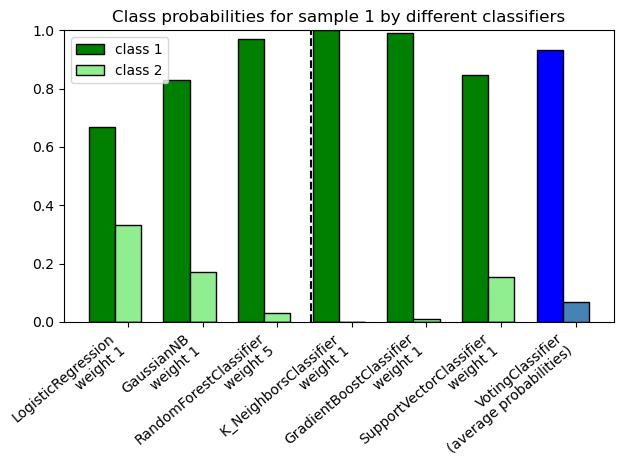

In [200]:
# plotting

N = 7  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-6
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color="green", edgecolor="k")
p2 = ax.bar(
    ind + width,
    np.hstack(([class2_1[:-1], [0]])),
    width,
    color="lightgreen",
    edgecolor="k",
)
p4 = ax.bar(ind, [0, 0, 0,0,0,0, class1_1[-1]], width, color="blue", edgecolor="k")
p4 = ax.bar(
    ind + width, [0, 0, 0,0,0,0, class2_1[-1]], width, color="steelblue", edgecolor="k"
)

# plot annotations
plt.axvline(2.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(
    [
        "LogisticRegression\nweight 1",
        "GaussianNB\nweight 1",
        "RandomForestClassifier\nweight 5",
        "K_NeighborsClassifier\nweight 1",
        "GradientBoostClassifier\nweight 1",
        "SupportVectorClassifier\nweight 1",
        "VotingClassifier\n(average probabilities)"
    ],
    rotation=40,
    ha="right",
)
plt.ylim([0, 1])
plt.title("Class probabilities for sample 1 by different classifiers")
plt.legend([p1[0], p2[0]], ["class 1", "class 2"], loc="upper left")
plt.tight_layout()
plt.show()

###### We can observe from the above plot the KNeighborsClassifier has also got a very good performance. Let us check it.

### KNeighborsClassifier (KNN)

In [201]:
knn=KNeighborsClassifier()

In [202]:
knn.fit(X,y)

KNeighborsClassifier()

### Accuracy Score of KNN

In [203]:
knn.score(xt,yt)

0.9324718632763651

In [204]:
accuracy_score(yt,knn.predict(xt))

0.9324718632763651

In [205]:
res=cross_val_score(knn,X,y,cv=5)  
res

array([0.93850964, 0.93121417, 0.9270073 , 0.93222106, 0.93952033])

In [206]:
res.mean()

0.9336945022091255

### Confusion Matrix of KNN

In [207]:
predicted_val=knn.predict(xt)
predicted_val

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

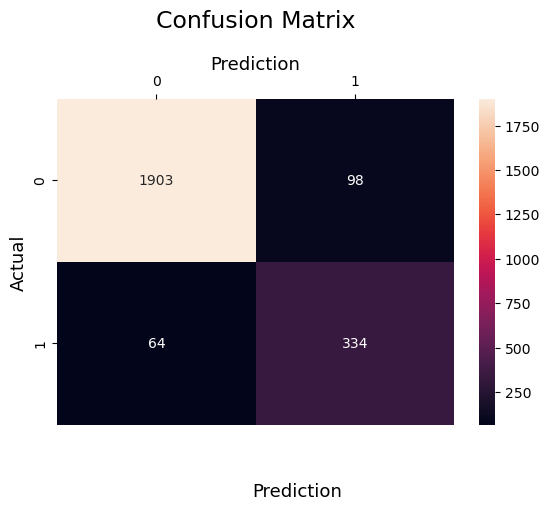

In [208]:
cm = confusion_matrix(yt,predicted_val)
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

### Classification Report of KNN

In [209]:
print(classification_report(yt,predicted_val))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2001
           1       0.77      0.84      0.80       398

    accuracy                           0.93      2399
   macro avg       0.87      0.90      0.88      2399
weighted avg       0.94      0.93      0.93      2399



### ROC Curve of KNN

In [210]:
y_scores=knn.predict_proba(xt)

In [211]:
fpr, tpr, thresholds=metrics.roc_curve(yt, y_scores[:,1])

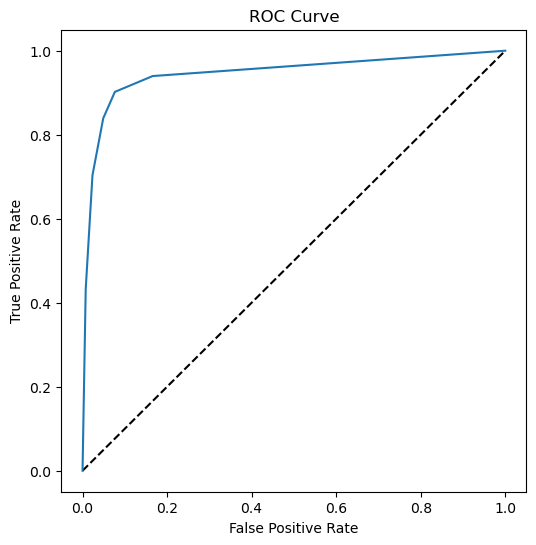

In [212]:
fig=plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### AUC Score of KNN

In [213]:
auc=metrics.roc_auc_score(yt, y_scores[:,1])
print(auc)

0.9456000642894633


### Decision Tree Classifier

In [214]:
dt=DecisionTreeClassifier()

In [215]:
dt.fit(X,y)

DecisionTreeClassifier()

In [216]:
dt.score(xt,yt)

0.9695706544393498

In [217]:
accuracy_score(yt,dt.predict(xt))

0.9695706544393498

In [218]:
res=cross_val_score(dt,X,y,cv=5)  
res

array([0.96925482, 0.97029703, 0.96871741, 0.96350365, 0.9734098 ])

In [219]:
res.mean()

0.9690365430813429

### Confusion Matrix of Decision Tree

In [220]:
predicted_val=knn.predict(xt)
predicted_val

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

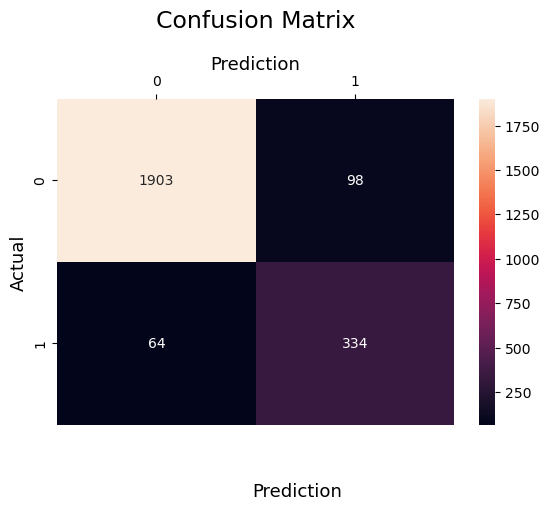

In [221]:
cm = confusion_matrix(yt,predicted_val)
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

### Classification Report of Decision Tree classifier

In [222]:
print(classification_report(yt,predicted_val))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2001
           1       0.77      0.84      0.80       398

    accuracy                           0.93      2399
   macro avg       0.87      0.90      0.88      2399
weighted avg       0.94      0.93      0.93      2399



### ROC Curve of Decision Tree Classifier

In [223]:
y_scores=dt.predict_proba(xt)

In [224]:
fpr, tpr, thresholds=metrics.roc_curve(yt, y_scores[:,1])

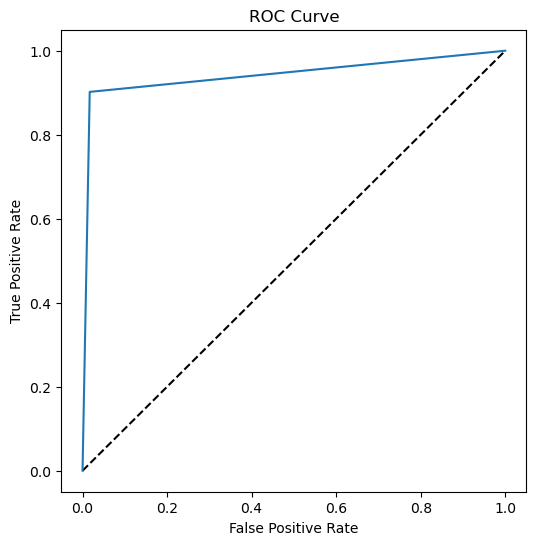

In [225]:
fig=plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## FINAL OBSERVATION

#### The best model identified is Random Forest Classifier

In [226]:
rf=RandomForestClassifier()

In [227]:
rf.fit(X,y)

RandomForestClassifier()

In [228]:
xt.head()

satisfaction_level  last_evaluation  number_project  \
8578                 0.82             0.95               6   
5756                 0.18             0.86               5   
3994                 0.63             0.98               4   
1784                 0.43             0.51               2   
10508                0.51             0.98               4   

       average_montly_hours  time_spend_company  Work_accident  \
8578                    191                   6              0   
5756                    267                   4              0   
3994                    160                   2              0   
1784                    149                   3              1   
10508                   245                   3              0   

       promotion_last_5years  sales  salary_low  salary_medium  
8578                       0      2           0              1  
5756                       0      2           0              1  
3994                       0      7           0              1  
1784                       0      2           0              1  
10508                      0      8           0              1

In [229]:
rf.score(X,y)  

1.0

In [230]:
predicted_val=rf.predict(xt);
predicted_val

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [231]:
pv=pd.DataFrame(predicted_val)
pv[0]

0       0
1       0
2       0
3       1
4       0
       ..
2394    0
2395    0
2396    0
2397    0
2398    0
Name: 0, Length: 2399, dtype: int64

In [232]:
accuracy_score(yt,rf.predict(xt))

0.9820758649437266

In [233]:
# Get Probability estimates

In [234]:
y_scores=rf.predict_proba(xt)

In [235]:
type(y_scores)

numpy.ndarray

In [236]:
y_scores

array([[0.87, 0.13],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.91, 0.09]])

In [237]:
y_scores[:, 1]

array([0.13, 0.  , 0.  , ..., 0.  , 0.  , 0.09])

In [238]:
fpr, tpr, thresholds=metrics.roc_curve(yt, y_scores[:,1])

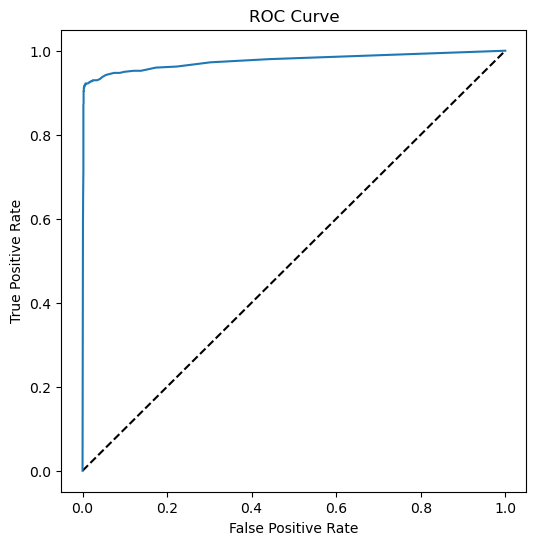

In [239]:
fig=plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [240]:
for i in range(len(X)):
    print("Satisfaction_level=%s,last_evaluation=%s,Predicted_val=%s,Actual_val=%s" %(xt.iloc[i,0],xt.iloc[i,1],pv.iloc[i],yt.iloc[i]))

Satisfaction_level=0.82,last_evaluation=0.95,Predicted_val=0    0
Name: 0, dtype: int64,Actual_val=0
Satisfaction_level=0.18,last_evaluation=0.86,Predicted_val=0    0
Name: 1, dtype: int64,Actual_val=0
Satisfaction_level=0.63,last_evaluation=0.98,Predicted_val=0    0
Name: 2, dtype: int64,Actual_val=0
Satisfaction_level=0.43,last_evaluation=0.51,Predicted_val=0    1
Name: 3, dtype: int64,Actual_val=1
Satisfaction_level=0.51,last_evaluation=0.98,Predicted_val=0    0
Name: 4, dtype: int64,Actual_val=0
Satisfaction_level=0.83,last_evaluation=0.92,Predicted_val=0    1
Name: 5, dtype: int64,Actual_val=1
Satisfaction_level=0.2,last_evaluation=0.9,Predicted_val=0    0
Name: 6, dtype: int64,Actual_val=0
Satisfaction_level=0.74,last_evaluation=0.84,Predicted_val=0    0
Name: 7, dtype: int64,Actual_val=0
Satisfaction_level=0.98,last_evaluation=0.5,Predicted_val=0    0
Name: 8, dtype: int64,Actual_val=0
Satisfaction_level=0.8,last_evaluation=1.0,Predicted_val=0    0
Name: 9, dtype: int64,Actual_v

Satisfaction_level=0.91,last_evaluation=0.83,Predicted_val=0    0
Name: 442, dtype: int64,Actual_val=0
Satisfaction_level=0.53,last_evaluation=0.74,Predicted_val=0    0
Name: 443, dtype: int64,Actual_val=0
Satisfaction_level=0.61,last_evaluation=0.56,Predicted_val=0    0
Name: 444, dtype: int64,Actual_val=0
Satisfaction_level=0.93,last_evaluation=0.55,Predicted_val=0    0
Name: 445, dtype: int64,Actual_val=0
Satisfaction_level=0.84,last_evaluation=0.69,Predicted_val=0    0
Name: 446, dtype: int64,Actual_val=0
Satisfaction_level=0.75,last_evaluation=0.87,Predicted_val=0    1
Name: 447, dtype: int64,Actual_val=1
Satisfaction_level=0.78,last_evaluation=0.91,Predicted_val=0    0
Name: 448, dtype: int64,Actual_val=0
Satisfaction_level=0.45,last_evaluation=0.53,Predicted_val=0    1
Name: 449, dtype: int64,Actual_val=1
Satisfaction_level=0.86,last_evaluation=0.66,Predicted_val=0    0
Name: 450, dtype: int64,Actual_val=0
Satisfaction_level=0.87,last_evaluation=0.9,Predicted_val=0    1
Name: 45

Satisfaction_level=0.55,last_evaluation=0.76,Predicted_val=0    0
Name: 1027, dtype: int64,Actual_val=0
Satisfaction_level=0.65,last_evaluation=0.54,Predicted_val=0    0
Name: 1028, dtype: int64,Actual_val=0
Satisfaction_level=0.79,last_evaluation=0.61,Predicted_val=0    0
Name: 1029, dtype: int64,Actual_val=0
Satisfaction_level=0.91,last_evaluation=0.56,Predicted_val=0    0
Name: 1030, dtype: int64,Actual_val=0
Satisfaction_level=0.63,last_evaluation=0.49,Predicted_val=0    0
Name: 1031, dtype: int64,Actual_val=0
Satisfaction_level=0.37,last_evaluation=0.49,Predicted_val=0    0
Name: 1032, dtype: int64,Actual_val=0
Satisfaction_level=0.8,last_evaluation=0.84,Predicted_val=0    0
Name: 1033, dtype: int64,Actual_val=0
Satisfaction_level=0.67,last_evaluation=0.86,Predicted_val=0    0
Name: 1034, dtype: int64,Actual_val=0
Satisfaction_level=0.98,last_evaluation=0.98,Predicted_val=0    0
Name: 1035, dtype: int64,Actual_val=0
Satisfaction_level=0.1,last_evaluation=0.84,Predicted_val=0    1


Satisfaction_level=0.18,last_evaluation=0.6,Predicted_val=0    0
Name: 1513, dtype: int64,Actual_val=0
Satisfaction_level=0.22,last_evaluation=0.55,Predicted_val=0    0
Name: 1514, dtype: int64,Actual_val=0
Satisfaction_level=0.61,last_evaluation=0.69,Predicted_val=0    0
Name: 1515, dtype: int64,Actual_val=0
Satisfaction_level=0.67,last_evaluation=0.65,Predicted_val=0    0
Name: 1516, dtype: int64,Actual_val=0
Satisfaction_level=0.86,last_evaluation=0.89,Predicted_val=0    0
Name: 1517, dtype: int64,Actual_val=0
Satisfaction_level=0.14,last_evaluation=0.41,Predicted_val=0    0
Name: 1518, dtype: int64,Actual_val=0
Satisfaction_level=0.9,last_evaluation=0.7,Predicted_val=0    0
Name: 1519, dtype: int64,Actual_val=0
Satisfaction_level=0.56,last_evaluation=0.75,Predicted_val=0    0
Name: 1520, dtype: int64,Actual_val=1
Satisfaction_level=0.8,last_evaluation=0.99,Predicted_val=0    0
Name: 1521, dtype: int64,Actual_val=0
Satisfaction_level=0.81,last_evaluation=0.62,Predicted_val=0    0
Na

Satisfaction_level=0.11,last_evaluation=0.9,Predicted_val=0    1
Name: 1968, dtype: int64,Actual_val=1
Satisfaction_level=0.6,last_evaluation=0.88,Predicted_val=0    0
Name: 1969, dtype: int64,Actual_val=0
Satisfaction_level=0.58,last_evaluation=0.51,Predicted_val=0    0
Name: 1970, dtype: int64,Actual_val=0
Satisfaction_level=0.48,last_evaluation=0.7,Predicted_val=0    0
Name: 1971, dtype: int64,Actual_val=0
Satisfaction_level=0.8,last_evaluation=0.91,Predicted_val=0    0
Name: 1972, dtype: int64,Actual_val=0
Satisfaction_level=0.92,last_evaluation=0.91,Predicted_val=0    0
Name: 1973, dtype: int64,Actual_val=0
Satisfaction_level=0.97,last_evaluation=0.52,Predicted_val=0    0
Name: 1974, dtype: int64,Actual_val=0
Satisfaction_level=0.92,last_evaluation=0.68,Predicted_val=0    0
Name: 1975, dtype: int64,Actual_val=0
Satisfaction_level=0.91,last_evaluation=0.85,Predicted_val=0    0
Name: 1976, dtype: int64,Actual_val=0
Satisfaction_level=0.71,last_evaluation=0.53,Predicted_val=0    0
Na

IndexError: index 2399 is out of bounds for axis 0 with size 2399

In [241]:
sns.set(rc={"figure.figsize":(10,10)})

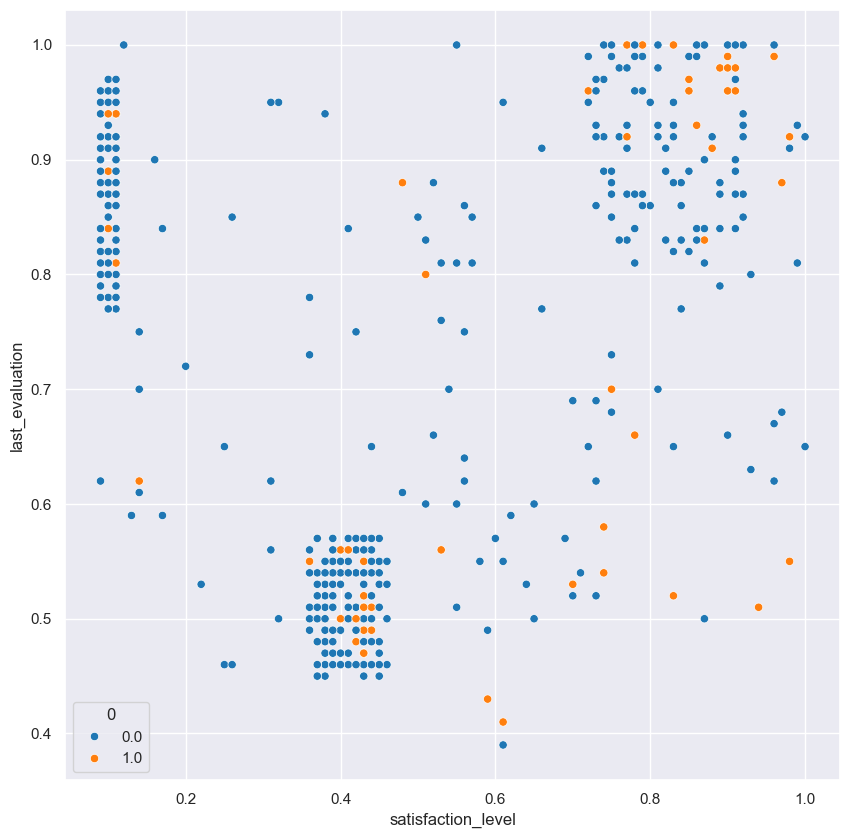

In [242]:
sns.scatterplot(x=xt.iloc[:,0],y=xt.iloc[:,1],hue=pv[0],palette='tab10')
plt.show()

In [243]:
xt.head()

satisfaction_level  last_evaluation  number_project  \
8578                 0.82             0.95               6   
5756                 0.18             0.86               5   
3994                 0.63             0.98               4   
1784                 0.43             0.51               2   
10508                0.51             0.98               4   

       average_montly_hours  time_spend_company  Work_accident  \
8578                    191                   6              0   
5756                    267                   4              0   
3994                    160                   2              0   
1784                    149                   3              1   
10508                   245                   3              0   

       promotion_last_5years  sales  salary_low  salary_medium  
8578                       0      2           0              1  
5756                       0      2           0              1  
3994                       0      7           0              1  
1784                       0      2           0              1  
10508                      0      8           0              1

In [244]:
def create_groups(probas, thresholds):
    groups = np.digitize(probas, bins=thresholds)
    return groups

In [245]:
thresholds = [0.2,0.6,0.9,1.0]
groups = create_groups(y_scores[:, 1], thresholds)

In [246]:
# Convert to DataFrame for better visualization
df = pd.DataFrame({'Probability': y_scores[:, 1], 'Group': groups})
print(df.head())



   Probability  Group
0         0.13      0
1         0.00      0
2         0.00      0
3         0.99      3
4         0.00      0


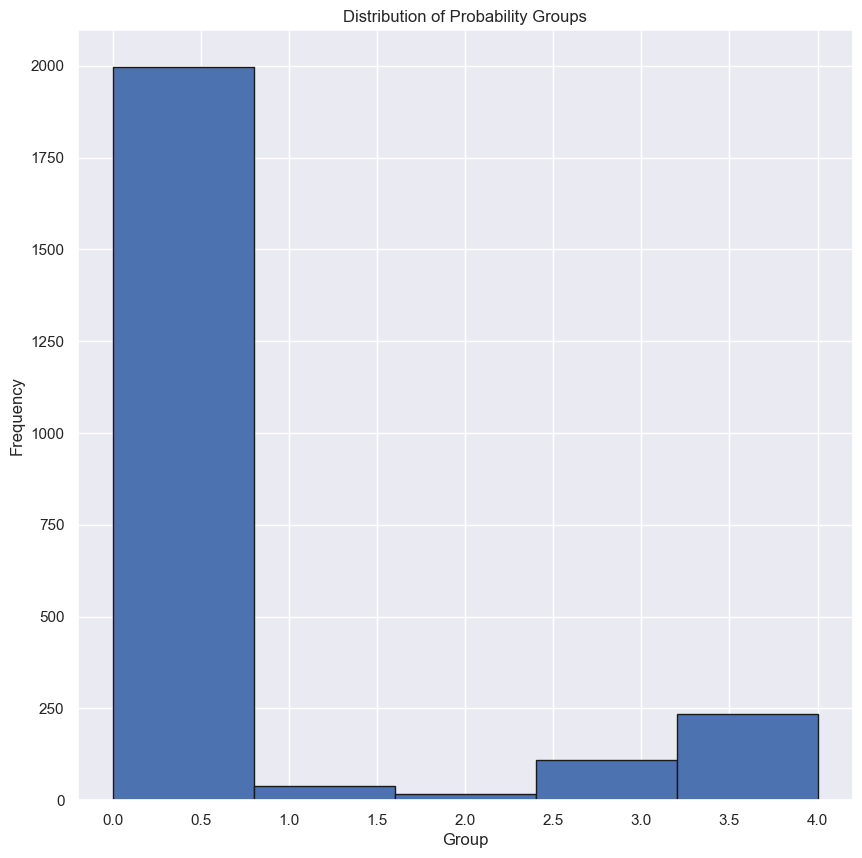

In [247]:
import matplotlib.pyplot as plt
plt.hist(df['Group'], bins=len(thresholds)+1, edgecolor='k')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.title('Distribution of Probability Groups')
plt.show()

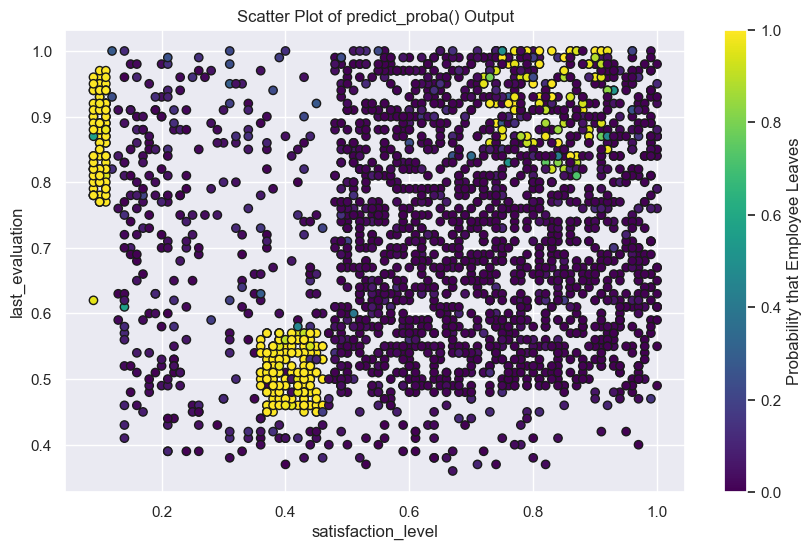

In [248]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(xt['satisfaction_level'], xt['last_evaluation'], c=y_scores[:, 1], cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='Probability that Employee Leaves')
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.title('Scatter Plot of predict_proba() Output')
plt.show()

### OBSERVATION

###### We observe from the following above scatter plot - 
(1) If the satisfaction level is very low then irrespective of the last evaluation being high the chances of employee leaveing is high.<BR/>
(2) If the satisfaction level is in between 35% to 50% and the last evaluation is also less than 50% then agin there are chances of employee leaving the company.<BR/>
(3) The are also cases where the satisfaction level is high and also the last evaluation is high but the employee is leaving.<BR/>
<B>Retension Stretegy</B> The satisfaction level is the most important feature determinig the probability of an employee leaving the organisation. So, the company HR policies should be such that the employee enjoys working in the company and finds optimal opportunities and responsibilities and reciprocal reward against his/her services.

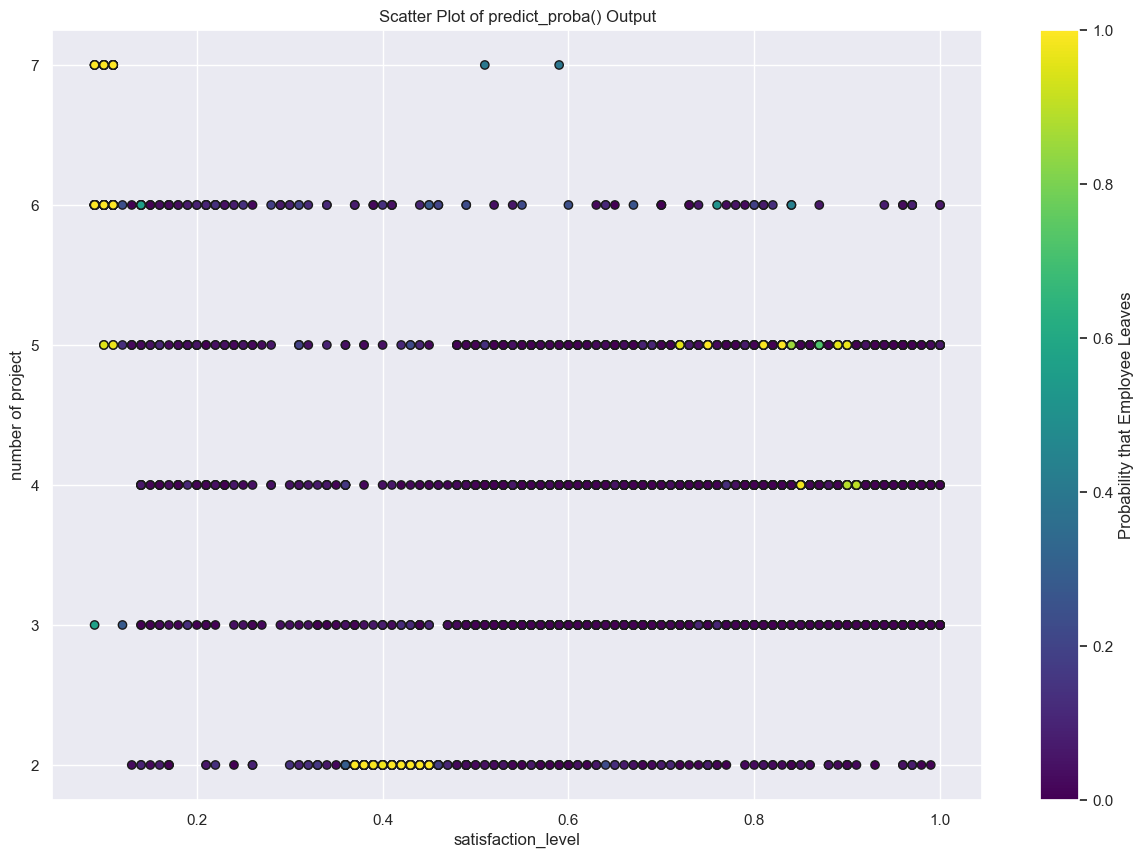

In [249]:
plt.figure(figsize=(15, 10))
scatter = plt.scatter(xt['satisfaction_level'], xt['number_project'], c=y_scores[:, 1], cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='Probability that Employee Leaves')
plt.xlabel('satisfaction_level')
plt.ylabel('number of project')
plt.title('Scatter Plot of predict_proba() Output')
plt.show()

### OBSERVATION

###### We observe the following from the above scatter plot -
(1) As the number of projects in which an employee is involved increase the satisfaction level goes down. This might be due to increase dwork pressure, tight deadlines, increased number of clients to handle etc.</br>
(2)As the number of projects starts going above 4 the satisfaction level goes down and the probability of employee leaving the company increases.

<B>Retension Stretegy</B>
The number od projects should be kept at an otimal level so that the employee may manage work pressure and deadlines without their satisfaction level going down.



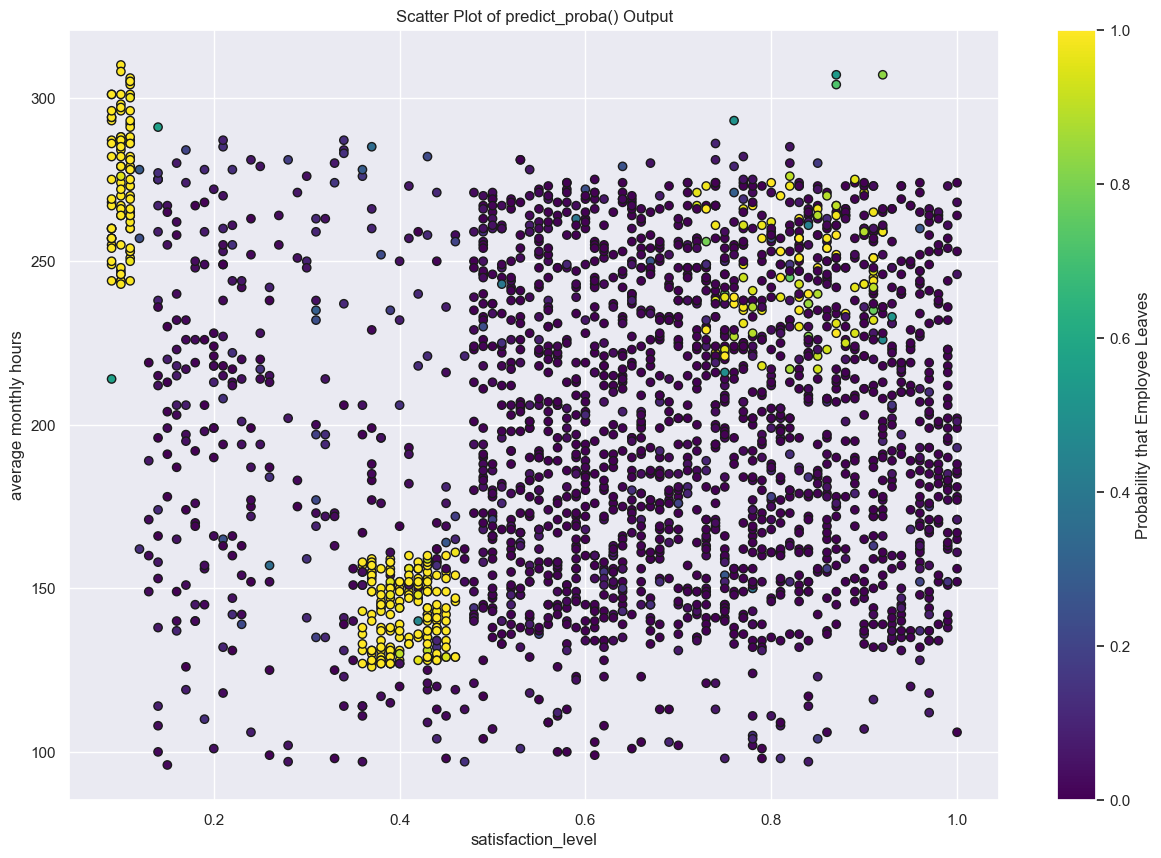

In [250]:
plt.figure(figsize=(15, 10))
scatter = plt.scatter(xt['satisfaction_level'], xt['average_montly_hours'], c=y_scores[:, 1], cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='Probability that Employee Leaves')
plt.xlabel('satisfaction_level')
plt.ylabel('average monthly hours')
plt.title('Scatter Plot of predict_proba() Output')
plt.show()

### OBSERVATION

###### We observe the following from the above scatter plot - 
(1) As the average monthly hours worked increases dissstisfaction increases. Average monthly hours above 250 is showing higher exit tendency among the employees.<Br/>
(2)It is also evident that if the employees are not engaged with sufficient work then also their satisfaction level is low. Hence greater probability of employee leaving the company.<br/>
<B>Retension Strategy</B> The employee should be alloted optimal number of projects thereby maintaining the balance between sufficient engagement and over load. If an employee is giving high average monthly hours to the company even though the number of projects are less, then the isssue with the employee should be identified with proper discussion with him/her. If the reason of high average monthly hours is the high number of projects then the work should be distributed in such a way that the pressure gets released from that employee.



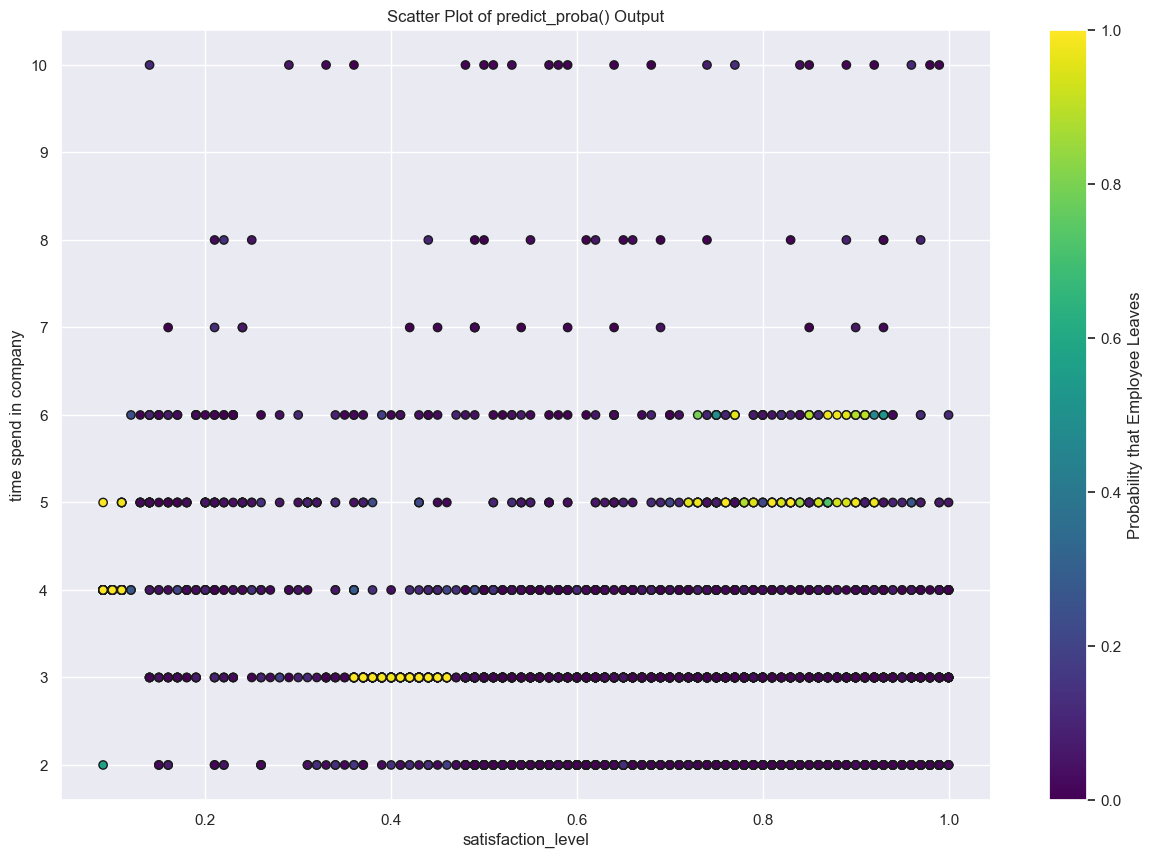

In [251]:
plt.figure(figsize=(15, 10))
scatter = plt.scatter(xt['satisfaction_level'], xt['time_spend_company'], c=y_scores[:, 1], cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='Probability that Employee Leaves')
plt.xlabel('satisfaction_level')
plt.ylabel('time spend in company')
plt.title('Scatter Plot of predict_proba() Output')
plt.show()

### OBSERVATION

###### We observe the following from the above scatter plot - 
(1) There is no exit within three years of joining. This might be due to the service bond conditions.<br/>
(2) On Thrid year there is some tendency seen in employee exit. These fall in the satisfaction range of 35% to 50%.
(3) Then there is leaving tendency in 5th and 6th year. This is amongst the highly satisfied employees. This seems to be related to career growth after getting adequate experience. After 6th year there are hardly any exit cases.
<B>Retension Stretegy</B>There should be an ecosystem in the company for adopting new technologies and upskilling of their employees accordingly. The employees should not think of swtching the company due to a feeling of getting stagnent. If am employee gets an evironment to enhance his/her knowledge and skills and implement them then the satisfaction level goes up.